# ppg.ipynb
Functions to examine rolling correlations between device sensor outputs.

Authors:  
– Jon Clucas, 2017 jon.clucas@childmind.org  
– Arno Klein, 2017  
© 2017, Child Mind Institute, Apache v2.0 License

setup:

In [2]:
%matplotlib inline
from annotate_range import annotation_line
from astropy.stats import median_absolute_deviation as mad
from chart_data import bland_altman_plot, df_devices, write_csv, xcorr
from chart_data_ppg import linechart
from config import short_dir, test_urls
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
from normalize_acc_data import actigraph_acc, geneactiv_acc
from plot_normalized_vector_lengths import demean_and_normalize
from utilities.fetch_data import fetch_check_data, fetch_data, fetch_hash
import json, matplotlib as mpl, numpy as np, os, pandas as pd, matplotlib.pyplot as plt
"""
with open(os.path.join('./line_charts/device_colors.json')) as fp:
    color_key = json.load(fp)
"""
pd.set_option('mode.use_inf_as_null', True)
ppg_hashes = {'E4_ppg': '19fa4ff38b0962c13144c7b511b6314e',
              'Wavelet_ppg': '1af7572640aea22a0af354bedbeb7a1e'}
if not os.path.exists('./sample_data'):
    os.makedirs('./sample_data')

In [2]:
df = df_devices(['E4', 'Wavelet'], 'ppg', datetime(2017, 4, 7, 4), datetime(2017, 4, 7, 5), ppg_hashes)

Retrieve file from URL: https://osf.io/v3ad6/?action=download&version=3
Copy file to cache: sample_data/19fa4ff38b0962c13144c7b511b6314e/E4_ppg.csv
Retrieve file from URL: https://osf.io/c5b9z/?action=download&version=1
Copy file to cache: sample_data/1af7572640aea22a0af354bedbeb7a1e/Wavelet_ppg.csv


In [3]:
[xcorr(df['nW'].values, df['infrared'].values), xcorr(df['nW'].values, df['red'].values),
 xcorr(df['infrared'].values, df['red'].values)]

[array([  3.86965331e-05]), array([  5.39021747e-05]), array([ 0.04324915])]

In [4]:
Evalues = df['nW'].values
WIvalues = df['infrared'].values
WRvalues = df['red'].values

shiftWIWR = len(WIvalues) - np.argmax(np.correlate(np.nan_to_num(WIvalues), np.nan_to_num(WRvalues), mode='full'))
shiftEWI = len(WIvalues) - np.argmax(np.correlate(np.nan_to_num(WIvalues), np.nan_to_num(Evalues), mode='full'))
shiftEWR = len(WRvalues) - np.argmax(np.correlate(np.nan_to_num(WRvalues), np.nan_to_num(Evalues), mode='full'))
shiftEW = np.int(np.nanmean([shiftEWI, shiftEWR]))
shift_EW = np.abs(shiftEW)
Evalues_shifted = Evalues[:Evalues.shape[0]-shift_EW]
WIvalues_shifted = WIvalues[shift_EW:WIvalues.shape[0]]
WRvalues_shifted = WRvalues[shift_EW:WRvalues.shape[0]]
[np.shape(Evalues_shifted), np.shape(WIvalues_shifted), np.shape(WRvalues_shifted)]
[xcorr(Evalues_shifted, WIvalues_shifted), xcorr(Evalues_shifted, WRvalues_shifted),
 xcorr(WIvalues_shifted, WRvalues_shifted)]

[array([-0.00053125]), array([-0.00081016]), array([ 0.04244929])]

Plotting...


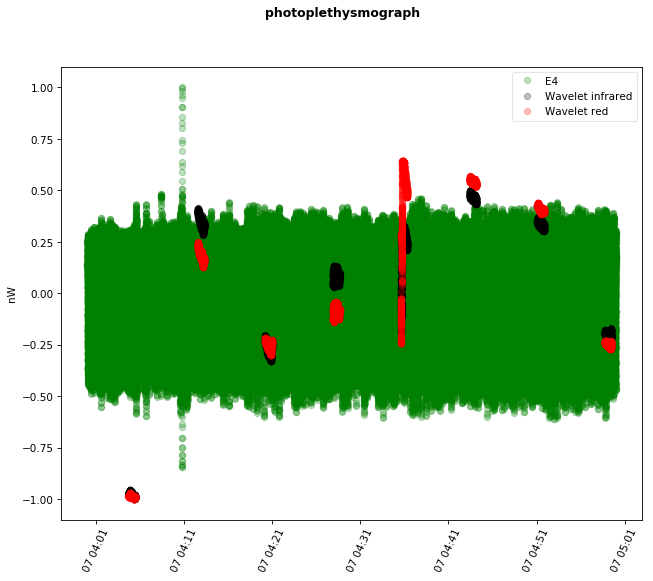

In [5]:
linechart(demean_and_normalize(df), line=False)

Plotting...


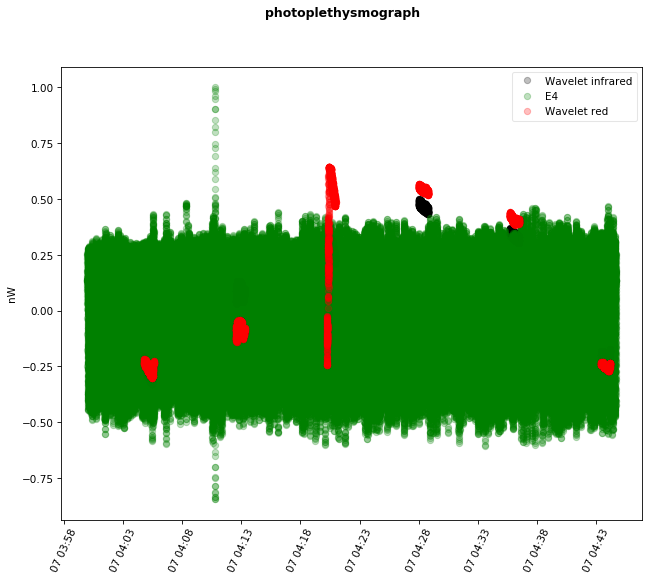

In [6]:
shifted_t = []
i = 0
while len(shifted_t) < np.shape(Evalues_shifted)[0]:
    shifted_t.append(df['nW'].index[i])
    i += 1
shifted_df = pd.DataFrame({'nW': Evalues_shifted,
            'infrared': WIvalues_shifted,
            'red': WRvalues_shifted, 'Timestamp':shifted_t})
shifted_df.set_index('Timestamp', inplace=True)
linechart(shifted_df, line=False)

Plotting...


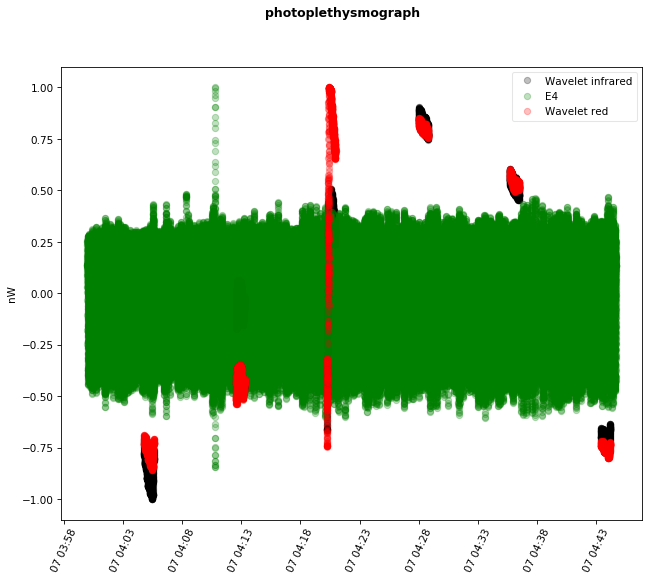

In [7]:
linechart(demean_and_normalize(shifted_df), line=False)

Plotting...


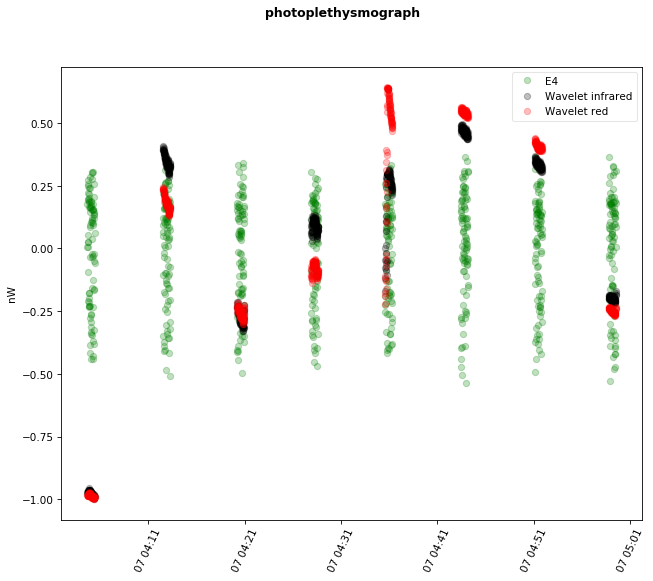

In [8]:
thinned_df = df.dropna(how="any", inplace=False)
linechart(thinned_df, line=False)

In [9]:
Evalues = thinned_df['nW'].values
WIvalues = thinned_df['infrared'].values
WRvalues = thinned_df['red'].values

shiftWIWR = len(WIvalues) - np.argmax(np.correlate(np.nan_to_num(WIvalues), np.nan_to_num(WRvalues), mode='full'))
shiftEWI = len(WIvalues) - np.argmax(np.correlate(np.nan_to_num(WIvalues), np.nan_to_num(Evalues), mode='full'))
shiftEWR = len(WRvalues) - np.argmax(np.correlate(np.nan_to_num(WRvalues), np.nan_to_num(Evalues), mode='full'))
shiftEW = np.int(np.nanmean([shiftEWI, shiftEWR]))
shift_EW = np.abs(shiftEW)
Evalues_shifted = Evalues[:Evalues.shape[0]-shift_EW]
WIvalues_shifted = WIvalues[shift_EW:WIvalues.shape[0]]
WRvalues_shifted = WRvalues[shift_EW:WRvalues.shape[0]]
[np.shape(Evalues_shifted), np.shape(WIvalues_shifted), np.shape(WRvalues_shifted)]
[xcorr(Evalues_shifted, WIvalues_shifted), xcorr(Evalues_shifted, WRvalues_shifted),
 xcorr(WIvalues_shifted, WRvalues_shifted)]

[array([ 0.0193899]), array([ 0.02140155]), array([ 0.95831809])]

Plotting...


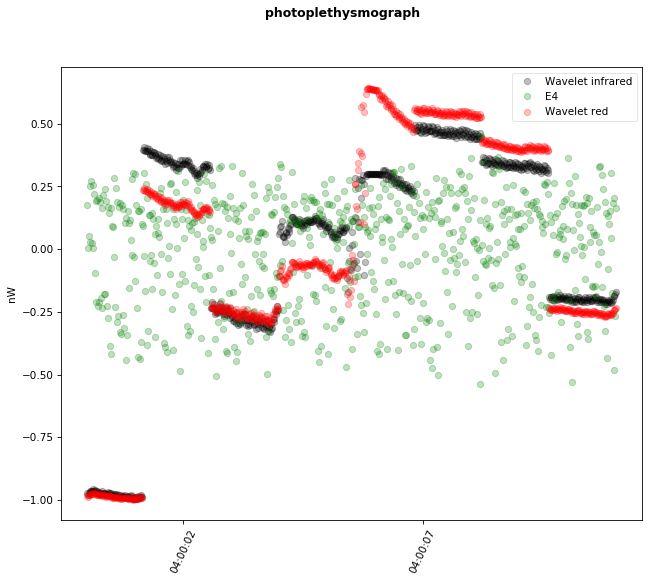

In [10]:
shifted_t = []
i = 0
while len(shifted_t) < np.shape(Evalues_shifted)[0]:
    shifted_t.append(df['nW'].index[i])
    i += 1
shifted_df = pd.DataFrame({'nW': Evalues_shifted,
            'infrared': WIvalues_shifted,
            'red': WRvalues_shifted, 'Timestamp':shifted_t})
shifted_df.set_index('Timestamp', inplace=True)
linechart(shifted_df, line=False)

In [15]:
df = df_devices(['E4', 'Wavelet'], 'ppg', datetime(2017, 4, 7, 4, 36, 0), datetime(2017, 4, 7, 4, 36, 10), ppg_hashes)

Retrieve file from URL: https://osf.io/v3ad6/?action=download&version=3
Copy file to cache: sample_data/19fa4ff38b0962c13144c7b511b6314e/E4_ppg.csv
Retrieve file from URL: https://osf.io/c5b9z/?action=download&version=1
Copy file to cache: sample_data/1af7572640aea22a0af354bedbeb7a1e/Wavelet_ppg.csv


In [16]:
[xcorr(df['nW'].values, df['infrared'].values), xcorr(df['nW'].values, df['red'].values),
 xcorr(df['infrared'].values, df['red'].values)]

[array([-0.00253811]), array([-0.00022669]), array([ 0.30446159])]

In [17]:
Evalues = df['nW'].values
WIvalues = df['infrared'].values
WRvalues = df['red'].values

shiftWIWR = len(WIvalues) - np.argmax(np.correlate(np.nan_to_num(WIvalues), np.nan_to_num(WRvalues), mode='full'))
shiftEWI = len(WIvalues) - np.argmax(np.correlate(np.nan_to_num(WIvalues), np.nan_to_num(Evalues), mode='full'))
shiftEWR = len(WRvalues) - np.argmax(np.correlate(np.nan_to_num(WRvalues), np.nan_to_num(Evalues), mode='full'))
shiftEW = np.int(np.nanmean([shiftEWI, shiftEWR]))
shift_EW = np.abs(shiftEW)
Evalues_shifted = Evalues[:Evalues.shape[0]-shift_EW]
WIvalues_shifted = WIvalues[shift_EW:WIvalues.shape[0]]
WRvalues_shifted = WRvalues[shift_EW:WRvalues.shape[0]]
[np.shape(Evalues_shifted), np.shape(WIvalues_shifted), np.shape(WRvalues_shifted)]
[xcorr(Evalues_shifted, WIvalues_shifted), xcorr(Evalues_shifted, WRvalues_shifted),
 xcorr(WIvalues_shifted, WRvalues_shifted)]

[array([ 0.04576684]), array([ 0.02783696]), array([ 0.32072038])]

Plotting...


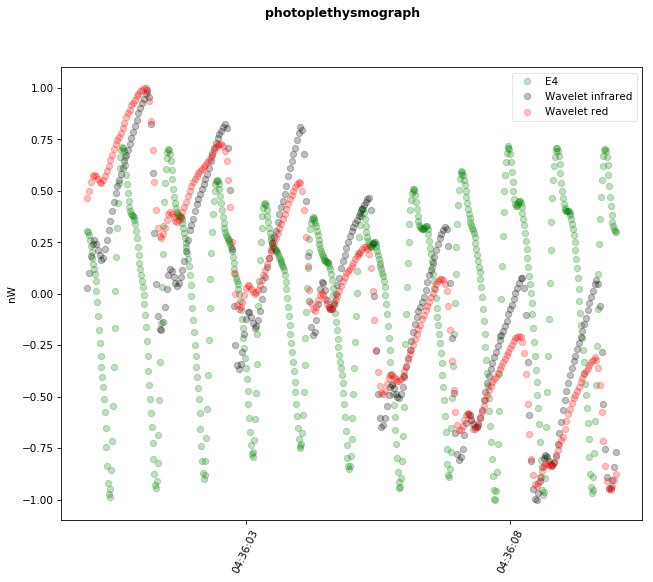

In [18]:
linechart(demean_and_normalize(df), line=False)

Plotting...


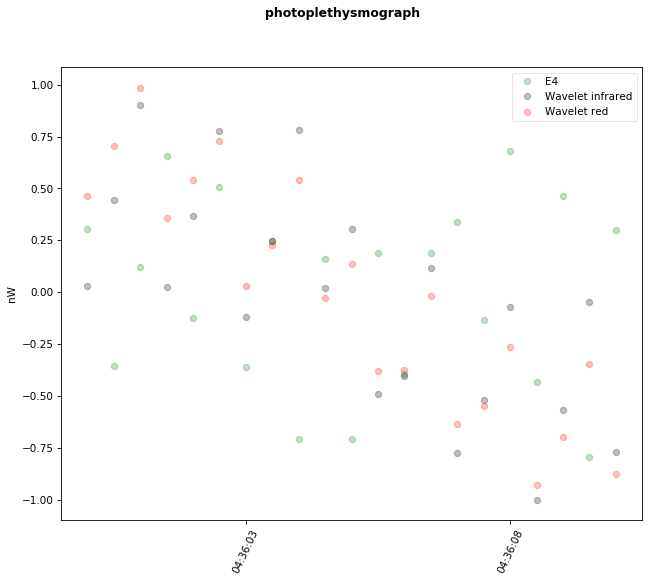

[array([-0.10364224]), array([-0.09055704]), array([ 0.963331])]

In [20]:
thinned_df = df.dropna(how="any", inplace=False)
linechart(thinned_df, line=False)
Evalues = thinned_df['nW'].values
WIvalues = thinned_df['infrared'].values
WRvalues = thinned_df['red'].values

shiftWIWR = len(WIvalues) - np.argmax(np.correlate(np.nan_to_num(WIvalues), np.nan_to_num(WRvalues), mode='full'))
shiftEWI = len(WIvalues) - np.argmax(np.correlate(np.nan_to_num(WIvalues), np.nan_to_num(Evalues), mode='full'))
shiftEWR = len(WRvalues) - np.argmax(np.correlate(np.nan_to_num(WRvalues), np.nan_to_num(Evalues), mode='full'))
shiftEW = np.int(np.nanmean([shiftEWI, shiftEWR]))
shift_EW = np.abs(shiftEW)
Evalues_shifted = Evalues[:Evalues.shape[0]-shift_EW]
WIvalues_shifted = WIvalues[shift_EW:WIvalues.shape[0]]
WRvalues_shifted = WRvalues[shift_EW:WRvalues.shape[0]]
[np.shape(Evalues_shifted), np.shape(WIvalues_shifted), np.shape(WRvalues_shifted)]
[xcorr(Evalues_shifted, WIvalues_shifted), xcorr(Evalues_shifted, WRvalues_shifted),
 xcorr(WIvalues_shifted, WRvalues_shifted)]

Plotting...


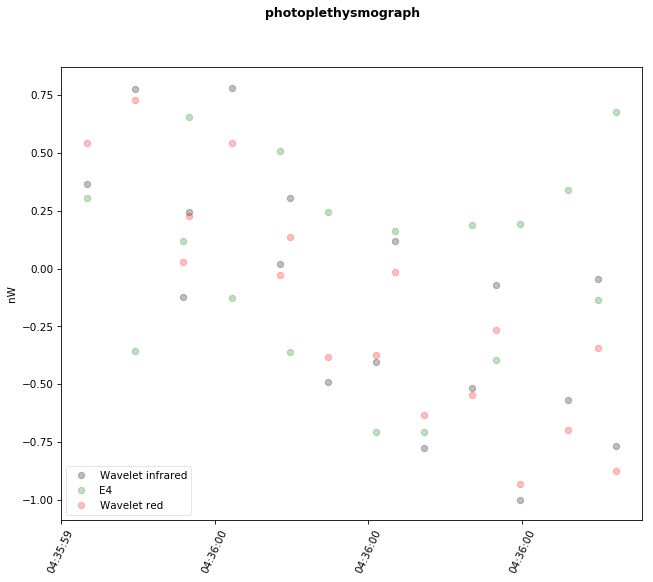

In [21]:
shifted_t = []
i = 0
while len(shifted_t) < np.shape(Evalues_shifted)[0]:
    shifted_t.append(df['nW'].index[i])
    i += 1
shifted_df = pd.DataFrame({'nW': Evalues_shifted,
            'infrared': WIvalues_shifted,
            'red': WRvalues_shifted, 'Timestamp':shifted_t})
shifted_df.set_index('Timestamp', inplace=True)
linechart(shifted_df, line=False)